<a href="https://www.kaggle.com/code/mltheaiengineer/nlp-analysis-michael-lorenz-digital-footprint?scriptVersionId=234535929" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
!pip install pyldavis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 44.4 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.2
    Uninstalling scipy-1.15.2:
      Successfully uninstalled scipy-1.15.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
nilearn 0.11.1 requires scikit-learn>=1.4.0, but you have scikit-learn 1.2.2 which is incompatible.
bigframes 1.36.0 requires rich<14,>=12.4.4, but you have rich 14.0.0 which is incompatible.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.2.2 which is incompatible.
plotnine 0.14.5 requires matplotlib>=3.8.0, but you have matplotlib 3.7.5 which is incompatible.


--- Setting up Libraries ---
You can install it in Kaggle notebooks using: !pip install pyldavis
Libraries imported.

--- Locating Input TXT File ---
Looking inside directory: /kaggle/input/profilanalyse-michael-lorenz-digitaler-fuabdruck/
Success: Found exactly one TXT file: 'Profilanalyse_Michael_Lorenz_digitaler_Fuabdruck.txt'.
Using automatically determined file path: '/kaggle/input/profilanalyse-michael-lorenz-digitaler-fuabdruck/Profilanalyse_Michael_Lorenz_digitaler_Fuabdruck.txt'
--------------------------------------------------

--- Setting up Language Model and Stopwords ---
spaCy model 'de_core_news_sm' not found. Attempting download...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 83.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('de_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You 

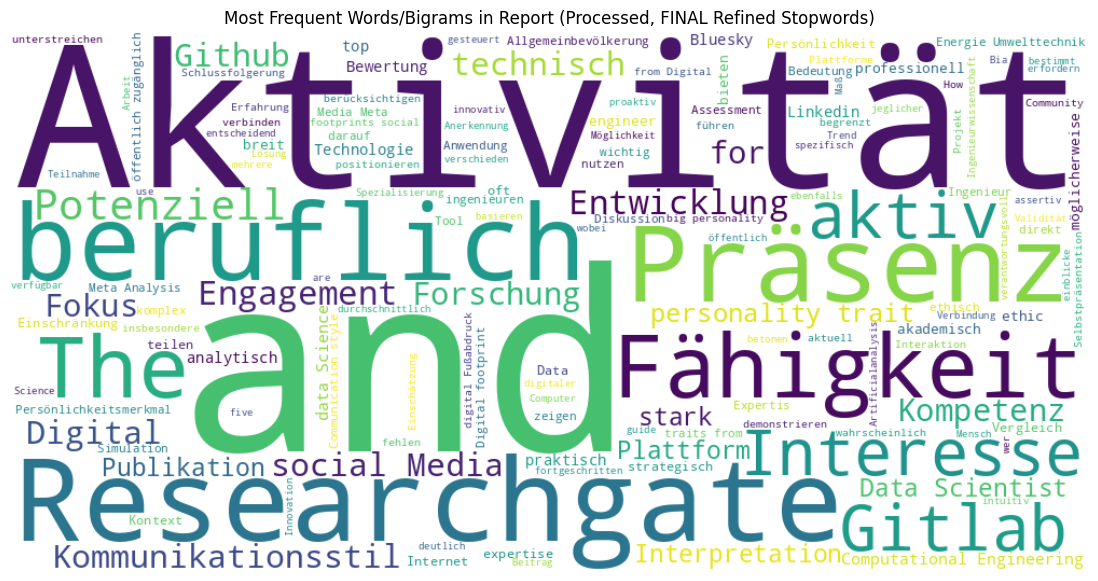


--- Named Entity Recognition (NER) ---
Performing NER...
NER found 369 entities.

Most Common Entity Types:
| Type   |   count |
|:-------|--------:|
| MISC   |     145 |
| ORG    |      81 |
| PER    |      77 |
| LOC    |      66 |

Most Common ORG & PER Entities (Sample):
| Entity                          |   count |
|:--------------------------------|--------:|
| Michael Lorenz                  |      24 |
| ResearchGate                    |       8 |
| KIT                             |       8 |
| Data Scientists                 |       4 |
| ArtificialAnalysis              |       4 |
| Bluesky                         |       3 |
| HPC                             |       3 |
| Online-Profile                  |       3 |
| Machine Learning                |       3 |
| KI                              |       3 |
| Digital Twins                   |       2 |
| MIR KI                          |       2 |
| Persönlichkeitsmerkmale         |       2 |
| Computational Engineering      

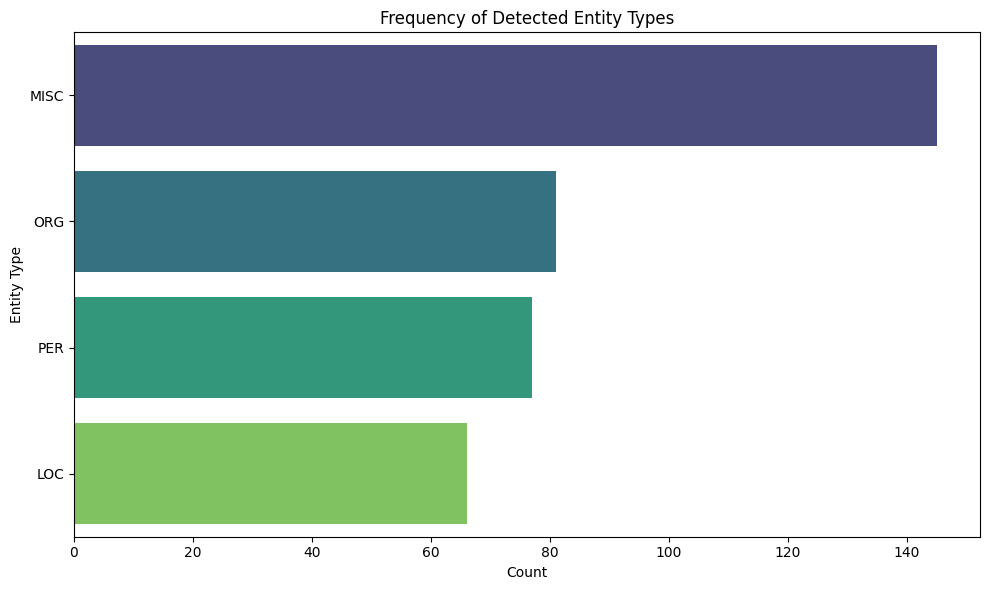


--- Keyword Extraction (TF-IDF) ---
Top 30 Keywords/Keyphrases (TF-IDF Score, FINAL Refined Stopwords):
| Keyword                |   TF-IDF Score |
|:-----------------------|---------------:|
| digital                |      0.202426  |
| data                   |      0.195197  |
| and                    |      0.166279  |
| researchgate           |      0.14459   |
| aktivität              |      0.14459   |
| beruflich              |      0.137361  |
| präsenz                |      0.137361  |
| personality            |      0.130131  |
| fähigkeit              |      0.122902  |
| the                    |      0.115672  |
| social                 |      0.115672  |
| gitlab                 |      0.108443  |
| aktiv                  |      0.108443  |
| interesse              |      0.108443  |
| persönlichkeitsmerkmal |      0.101213  |
| science                |      0.101213  |
| potenziell             |      0.101213  |
| entwicklung            |      0.0939835 |
| engagement   

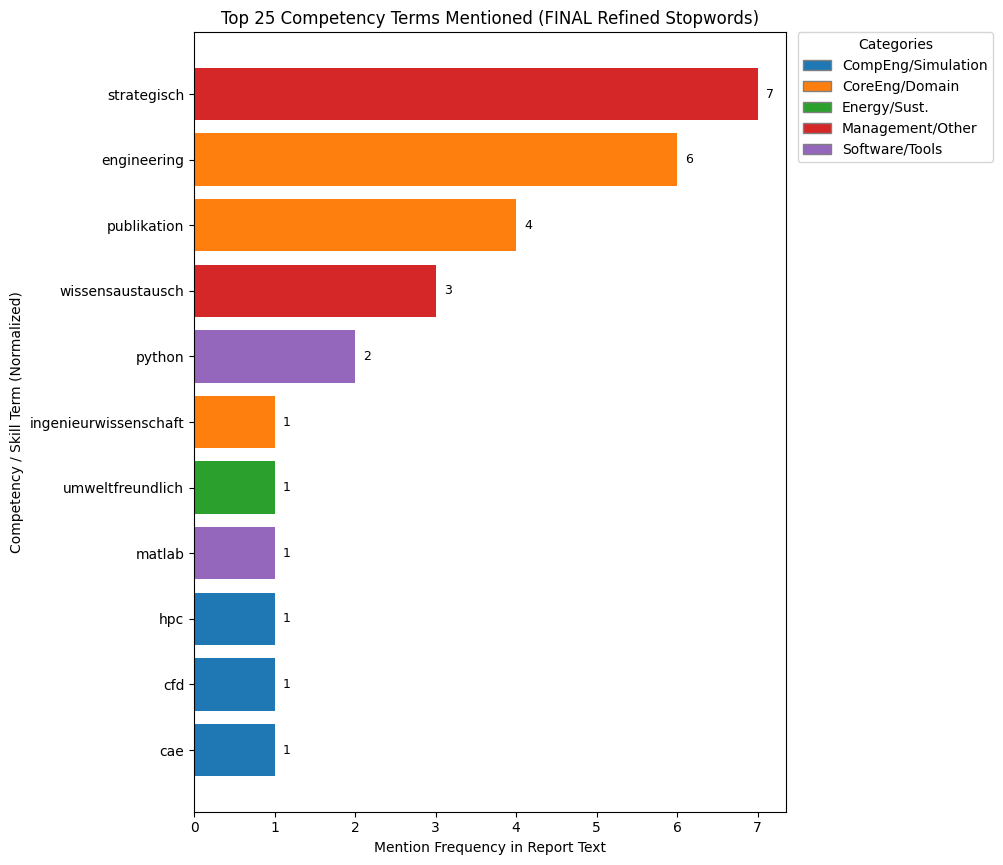


--- Automated Summary of Report Analysis Findings (FINAL Refined Stopwords) ---

========================== Automated Textual Summary ===========================
Automated summary from NLP analysis of the **German-language profile report** on Michael Lorenz (using FINAL refined stopwords):

**NER:** Top entity types: **MISC, ORG, PER**.
- Top mentioned ORGs: **KIT, ResearchGate, Data Scientists**.
- Top MISC entities (terms/concepts): **GitLab, GitHub, accessed on April 3, Kl, Data Scientists**.

**Keywords:** Top terms via TF-IDF suggest report focus on: **'digital', 'data', 'and'**, etc.

**Topics (LDA):** The 6 main themes suggested include:
- **Topic 1**: Key terms 'diskussion, researchgate, data...'
- **Topic 2**: Key terms 'beruflich, bieten, and...'
- **Topic 3**: Key terms 'interpretation, aktivität, beruflich...'
- **Topic 4**: Key terms 'traits, personality, social...'
- **Topic 5**: Key terms 'aktiv, top, linkedin...'
- **Topic 6**: Key terms 'researchgate, engineering, ent

In [2]:
# -*- coding: utf-8 -*-
# Kaggle Notebook: NLP Analysis and Competency Extraction from Michael Lorenz's Digital Footprint Report

# --- 0. Setup and Imports ---
print("--- Setting up Libraries ---")
import os
import pandas as pd
import nltk
import spacy
import re
# ---> KORREKTUR: Import für Stopwords hinzugefügt <---
from nltk.corpus import stopwords
# Standard NLP/ML libs
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
# Visualization libs
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch # For custom legends
# Interactive LDA visualization
try:
    import pyLDAvis
    import pyLDAvis.sklearn
    # Ensure display works in notebook
    from IPython.display import display
    pyLDAvis.enable_notebook()
    print("pyLDAvis imported successfully.")
except ImportError:
    print("WARNING: pyLDAvis is not installed. Skipping interactive LDA visualization.")
    print("You can install it in Kaggle notebooks using: !pip install pyldavis")
    pyLDAvis = None # Set to None if not available
# Other
import warnings

# Ignore common warnings
warnings.filterwarnings("ignore")
print("Libraries imported.")

# --- 1. Configuration & Robust File Path Finding ---
print("\n--- Locating Input TXT File ---")
# !!! IMPORTANT: Double-check this slug matches your dataset's URL slug on Kaggle !!!
dataset_slug = 'profilanalyse-michael-lorenz-digitaler-fuabdruck'
dataset_dir = f'/kaggle/input/{dataset_slug}/'
print(f"Looking inside directory: {dataset_dir}")

found_txt_file = None
file_path = None # Initialize file_path

try:
    items_in_dir = os.listdir(dataset_dir)
    txt_files = [f for f in items_in_dir if f.lower().endswith('.txt')]

    if len(txt_files) == 1:
        # Case 1: Exactly one TXT file found - use it automatically
        found_txt_file = txt_files[0]
        file_path = os.path.join(dataset_dir, found_txt_file)
        print(f"Success: Found exactly one TXT file: '{found_txt_file}'.")
        print(f"Using automatically determined file path: '{file_path}'")
    elif len(txt_files) > 1:
        # Case 2: Multiple TXT files found - require manual intervention
        print(f"WARNING: Found multiple TXT files in {dataset_dir}:")
        for f in txt_files: print(f"  - '{f}'")
        print(">>> Please specify the correct filename manually in the 'file_path' variable definition below! <<<")
        file_path = None
    else:
        # Case 3: No TXT files found
        print(f"WARNING: No TXT files found in '{dataset_dir}'.")
        if items_in_dir: print(f"Other files/folders found: {items_in_dir}")
        else: print("The directory seems to be empty.")
        print(">>> Please check if the TXT file was uploaded correctly. You will need to set 'file_path' manually below. <<<")
        file_path = None

except FileNotFoundError:
    # Case 4: Dataset directory itself not found
    print(f"\n!!!!!!!!!!!!!!!! ERROR: Directory '{dataset_dir}' NOT found. !!!!!!!!!!!!!!!!")
    print(f"Possible issues: Incorrect 'dataset_slug' ('{dataset_slug}') OR Dataset not attached.")
    try: print(f"Contents of /kaggle/input/: {os.listdir('/kaggle/input/')}")
    except Exception as e_base: print(f"Could not list /kaggle/input/: {e_base}")
    print(f"!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
    file_path = None
except Exception as e:
    print(f"\nAn unexpected error occurred while listing directory contents: {e}")
    file_path = None

# --- MANUAL FALLBACK PATH DEFINITION ---
if file_path is None:
    print("\n>>> Automatic file detection failed or needs confirmation. Defining path manually. <<<")
    print(">>> !!! PLEASE VERIFY AND CORRECT THE PATH AND FILENAME BELOW MANUALLY !!! <<<")
    manual_filename = 'Profilanalyse_Michael_Lorenz_digitaler_Fuabdruck.txt' # Check this carefully!
    file_path = os.path.join(dataset_dir, manual_filename)
    print(f"Manual fallback path set to: '{file_path}'")
    print(">>> Ensure this path is correct before proceeding! <<<")

print("-" * 50)


# --- 2. Language Model and Stopwords Setup ---
print("\n--- Setting up Language Model and Stopwords ---")
nlp = None
try:
    # Attempt to load the spaCy model
    nlp = spacy.load("de_core_news_sm")
    print("spaCy model 'de_core_news_sm' loaded successfully.")
except OSError:
    # If loading fails, try to download and then load again
    print("spaCy model 'de_core_news_sm' not found. Attempting download...")
    try:
        # Use correct indentation here
        spacy.cli.download("de_core_news_sm")
        nlp = spacy.load("de_core_news_sm")
        print("spaCy model 'de_core_news_sm' downloaded and loaded successfully.")
        print("Recommendation: You might need to restart the Kernel/Runtime now.")
    except Exception as e_download:
        print(f"ERROR: Failed to download or load spaCy model after attempt: {e_download}")
except Exception as e_load:
     print(f"ERROR: An unexpected error occurred while loading spaCy model: {e_load}")


# Download nltk data if necessary
print("Checking NLTK stopwords...")
try:
    nltk.data.find('corpora/stopwords')
    print("NLTK stopwords corpus found.")
except LookupError:
    print("NLTK stopwords corpus not found. Downloading...")
    try:
        # Use correct indentation here
        nltk.download('stopwords', quiet=True)
        print("NLTK stopwords downloaded.")
    except Exception as e_nltk_download:
        print(f"Error downloading NLTK stopwords: {e_nltk_download}")

# Load German stopwords (now with correct import at the top)
german_stop_words = []
try:
    # This should work now because 'stopwords' is imported via 'from nltk.corpus import stopwords'
    german_stop_words_base = stopwords.words('german')
    # Using the refined custom stopwords list
    custom_stops = [
        'michael', 'lorenz', 'herr', 'm.sc.', 'kit', 'pdf', 'datei', 'hin', 'deuten',
        'sowie', 'dabei', 'insgesamt', 'jedoch', 'bereits', 'deutet', 'zeigt', 'könnte', 'lässt',
        'schließen', 'hervorgehoben', 'genannt', 'gibt', 'können', 'hinaus', 'somit', 'deutlicht',
        'allerdings', 'grundlage', 'bereich', 'thema', 'themen', 'rahmen', 'person',
        'abgeleiteten', 'basierend', 'etwa', 'einer', 'deutlic', 'ab', 'sei', 'deutschen',
        'beispielsweise', 'weitere', 'lässt schließen', 'hinsicht', 'zudem', 'innerhalb', 'solcher',
        'nutzung', 'einsatz', 'aspekt', 'methode', 'siehe', 'abbildung', 'tabelle',
        'url', 'http', 'https', 'www', 'accessed', 'april',
        'bericht', 'analyse', 'profil', 'daten', 'information', 'online'
    ]
    german_stop_words = list(set(german_stop_words_base + custom_stops))
    print(f"Loaded {len(german_stop_words)} German stopwords (refined custom list).")
except NameError:
     print("ERROR: 'stopwords' object still not defined. NLTK import might have failed unexpectedly.")
except Exception as e_stopwords:
    print(f"ERROR: Could not load/customize German stopwords: {e_stopwords}")


# --- 3. Data Loading and Preprocessing Function Definition ---
# (Code remains the same as previous correct version)
print("\n--- Defining Preprocessing Function ---")
def preprocess_text(text, use_lemma=True):
    """Cleans and preprocesses the input text using spaCy for lemmatization (optional)."""
    if not text or not nlp: return ""
    text = re.sub(r'\[source: \d+\]', '', text, flags=re.IGNORECASE)
    text = re.sub(r'--- PAGE \d+ ---', '', text, flags=re.IGNORECASE)
    text = re.sub(r'the following table:', '', text, flags=re.IGNORECASE)
    text = text.replace('•', '')
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', ' ', text, flags=re.MULTILINE)
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\d+', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    doc = nlp(text)
    # Use the globally defined german_stop_words list (should be populated now)
    if use_lemma: tokens = [token.lemma_ for token in doc if token.is_alpha and token.lemma_ not in german_stop_words and len(token.lemma_) > 2]
    else: tokens = [token.text for token in doc if token.is_alpha and token.text not in german_stop_words and len(token.text) > 2]
    return ' '.join(tokens)
print("Preprocessing function defined.")

# --- 4. Load and Process the Main Data ---
# (Code remains the same, added check for german_stop_words list availability)
print("\n--- Loading and Preprocessing Main Text ---")
report_text = ""; processed_text = ""
df_entities = pd.DataFrame(columns=['Entity', 'Type']); df_keywords = pd.DataFrame(columns=['Keyword', 'TF-IDF Score']); df_competencies = pd.DataFrame(columns=['Skill_Term', 'count', 'category'])
lda_model = None; lda_matrix = None; count_vectorizer_lda = None; topic_summaries = {}
if file_path and os.path.exists(file_path):
    try:
        with open(file_path, 'r', encoding='utf-8') as f: report_text = f.read()
        print(f"Successfully loaded: '{file_path}'. Length: {len(report_text)} chars.")
        if report_text and nlp and german_stop_words: # Added check for stopwords list
            print("Preprocessing text (using FINAL refined stopword list)..."); processed_text = preprocess_text(report_text, use_lemma=True)
            if processed_text: print(f"Preprocessing complete. Processed length: {len(processed_text)} chars.")
            else: print("WARNING: Preprocessing resulted in empty text.")
        elif not nlp: print("ERROR: Cannot preprocess text - spaCy model not loaded.")
        elif not german_stop_words: print("ERROR: Cannot preprocess text - Stopwords list is empty or not loaded correctly.") # More specific error
        else: print("WARNING: Input text file seems empty.")
    except Exception as e: print(f"ERROR during loading/processing: {e}")
else: print(f"ERROR: Skipping Data Loading - File path invalid ('{file_path}'). Check Section 1 output and definition.")


# --- 5. EDA: Word Cloud Visualization ---
# (Code remains the same, uses global german_stop_words)
if processed_text:
    print("\n--- Basic Text Analysis & Word Cloud ---")
    if len(processed_text.split()) > 5:
        try:
            wordcloud = WordCloud(width=1000, height=500, background_color='white', stopwords=set(german_stop_words), max_words=150, collocations=True).generate(processed_text)
            plt.figure(figsize=(15, 7)); plt.imshow(wordcloud, interpolation='bilinear'); plt.axis('off'); plt.title('Most Frequent Words/Bigrams in Report (Processed, FINAL Refined Stopwords)'); plt.show()
        except Exception as e: print(f"Could not generate word cloud: {e}")
    else: print("Skipping Word Cloud: Processed text too short.")
else: print("\nSkipping Word Cloud: Processed text unavailable.")

# --- 6. Named Entity Recognition (NER) ---
# (Code remains the same)
if report_text and nlp:
    print("\n--- Named Entity Recognition (NER) ---")
    ner_text = re.sub(r'--- PAGE \d+ ---|\[source: \d+\]', '', report_text, flags=re.IGNORECASE); ner_text = re.sub(r'\s+', ' ', ner_text).strip()
    nlp.max_length = len(ner_text) + 100
    try:
        print(f"Performing NER..."); doc_ner = nlp(ner_text)
        entities = [(ent.text.strip(), ent.label_) for ent in doc_ner.ents if len(ent.text.strip()) > 1]
        if entities:
            df_entities = pd.DataFrame(entities, columns=['Entity', 'Type'])
            print(f"NER found {len(df_entities)} entities.")
            print("\nMost Common Entity Types:"); print(df_entities['Type'].value_counts().head(10).to_markdown())
            print("\nMost Common ORG & PER Entities (Sample):"); print(df_entities[df_entities['Type'].isin(['ORG', 'PER'])]['Entity'].value_counts().head(20).to_markdown())
            print("\nMost Common MISC & LOC Entities (Sample):"); df_misc_loc = df_entities[df_entities['Type'].isin(['MISC', 'LOC'])]; df_misc_loc = df_misc_loc[df_misc_loc['Entity'].str.len() > 2]; print(df_misc_loc['Entity'].value_counts().head(20).to_markdown())
            if not df_entities.empty: plt.figure(figsize=(10, max(6, len(df_entities['Type'].unique())*0.5))); sns.countplot(y='Type', data=df_entities, order=df_entities['Type'].value_counts().index, palette='viridis'); plt.title('Frequency of Detected Entity Types'); plt.xlabel('Count'); plt.ylabel('Entity Type'); plt.tight_layout(); plt.show()
        else: print("No named entities found.")
    except Exception as e: print(f"An error occurred during NER: {e}")
else: print("\nSkipping NER: Input text or spaCy model unavailable.")

# --- 7. Keyword / Keyphrase Extraction (TF-IDF) ---
# (Code remains the same, uses global german_stop_words)
if processed_text:
    print("\n--- Keyword Extraction (TF-IDF) ---")
    if len(processed_text.split()) > 10:
        try:
            tfidf_vectorizer = TfidfVectorizer(stop_words=german_stop_words, max_features=5000, ngram_range=(1,2))
            tfidf_matrix = tfidf_vectorizer.fit_transform([processed_text])
            feature_names = tfidf_vectorizer.get_feature_names_out()
            scores = tfidf_matrix.toarray().flatten()
            df_keywords = pd.DataFrame({'Keyword': feature_names, 'TF-IDF Score': scores}).sort_values(by='TF-IDF Score', ascending=False)
            print("Top 30 Keywords/Keyphrases (TF-IDF Score, FINAL Refined Stopwords):"); print(df_keywords.head(30).to_markdown(index=False))
        except Exception as e: print(f"Could not perform TF-IDF: {e}")
    else: print("Skipping TF-IDF: Processed text too short.")
else: print("\nSkipping Keyword Extraction: Processed text unavailable.")

# --- 8. Topic Modeling (LDA) & Visualization ---
# (Code remains the same, uses global german_stop_words)
if report_text and nlp and german_stop_words:
    print("\n--- Topic Modeling (LDA) ---")
    paragraphs = [p.strip() for p in re.split(r'\n\s*\n', report_text) if len(p.strip()) > 200]
    print(f"Splitting into {len(paragraphs)} paragraphs for LDA.")
    if len(paragraphs) >= 5:
        print("Preprocessing paragraphs..."); processed_paragraphs = [preprocess_text(p, use_lemma=True) for p in paragraphs]
        processed_paragraphs = [p for p in processed_paragraphs if len(p.split()) > 15]
        print(f"Using {len(processed_paragraphs)} valid paragraphs for LDA.")
        if len(processed_paragraphs) >= 5:
            try:
                count_vectorizer_lda = CountVectorizer(stop_words=german_stop_words, max_df=0.90, min_df=3)
                lda_matrix = count_vectorizer_lda.fit_transform(processed_paragraphs)
                if lda_matrix.shape[1] > 10:
                    n_topics = 6
                    print(f"Fitting LDA model ({n_topics} topics)..."); lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42, learning_method='batch', max_iter=20); lda_model.fit(lda_matrix)
                    print(f"\nTop 12 Words per Topic (LDA, FINAL Refined Stopwords):")
                    feature_names_lda = count_vectorizer_lda.get_feature_names_out()
                    topic_summaries = {}
                    for index, topic_dist in enumerate(lda_model.components_):
                        top_words_indices = topic_dist.argsort()[-12:][::-1]; top_words = ", ".join([feature_names_lda[i] for i in top_words_indices])
                        topic_summaries[f"Topic {index+1}"] = top_words
                        print(f"Topic #{index+1}: {top_words}")
                    print("\nInterpretation Note: Topics should now reflect more specific themes.")
                    # --- pyLDAvis Visualization ---
                    if pyLDAvis and lda_model and count_vectorizer_lda and lda_matrix is not None:
                        print("\n--- Interactive Topic Visualization (pyLDAvis) ---")
                        print("Preparing pyLDAvis data...");
                        try:
                            vis_data = pyLDAvis.sklearn.prepare(lda_model, lda_matrix, count_vectorizer_lda, mds='mmds')
                            print("Displaying interactive visualization...")
                            display(vis_data) # Use display() in notebook
                        except Exception as e_vis: print(f"Could not generate pyLDAvis visualization: {e_vis}")
                    else: print("\nSkipping pyLDAvis visualization (library not installed/imported or LDA failed).")
                else: print("Could not perform LDA: Insufficient features after vectorization.")
            except Exception as e: print(f"An error occurred during Topic Modeling: {e}")
        else: print("Skipping LDA: Not enough valid paragraphs.")
    else: print("Skipping LDA: Not enough paragraphs.")
else: print("\nSkipping LDA: Input text, spaCy model, or stopwords unavailable.")


# --- 9. Automated Competency Profile Generation ---
# (Code remains the same, uses global processed_text)
print("\n--- Generating Competency Profile based on Report Text ---")
skill_mapping = { 'ki': 'AI/ML', 'künstlich intelligenz': 'AI/ML', 'ai': 'AI/ML', 'artificial intelligence': 'AI/ML', 'machine learning': 'AI/ML', 'ml': 'AI/ML', 'neuronale netz': 'AI/ML', 'neuronal netz': 'AI/ML', 'data scientist': 'AI/ML', 'data science': 'AI/ML', 'kl gesteuert optimierung': 'AI/ML', 'optimierung': 'AI/ML', 'topology optimization': 'AI/ML', 'topologieoptimierung': 'AI/ML', 'artificialanalysis': 'AI/ML', 'computational engineering': 'CompEng/Simulation', 'cae': 'CompEng/Simulation', 'computer aided engineering': 'CompEng/Simulation', 'fluidmechanik': 'CompEng/Simulation', 'cfd': 'CompEng/Simulation', 'mathematisch modellierung': 'CompEng/Simulation', 'modellierung': 'CompEng/Simulation', 'numerisch simulation': 'CompEng/Simulation', 'simulation': 'CompEng/Simulation', 'simulationstechnik': 'CompEng/Simulation', 'des': 'CompEng/Simulation', 'hpc': 'CompEng/Simulation', 'high performance computing': 'CompEng/Simulation', 'computational science': 'CompEng/Simulation', 'automobilsimulation': 'CompEng/Simulation', 'python': 'Software/Tools', 'matlab': 'Software/Tools', 'gitlab': 'Software/Tools', 'github': 'Software/Tools', 'cloud computing': 'Software/Tools', 'versionkontrolle': 'Software/Tools', 'softwareentwicklung': 'Software/Tools', 'open source': 'Software/Tools', 'digital infrastruktur': 'Software/Tools', 'plattform': 'Software/Tools', 'energie': 'Energy/Sust.', 'umwelttechnik': 'Energy/Sust.', 'nachhaltig energie': 'Energy/Sust.', 'nachhaltigkeit': 'Energy/Sust.', 'sustainable energy': 'Energy/Sust.', 'sustainable innovation': 'Energy/Sust.', 'elektromobilität': 'Energy/Sust.', 'electric mobility': 'Energy/Sust.', 'batterieprüfung': 'Energy/Sust.', 'batterietechnik': 'Energy/Sust.', 'kreislaufwirtschaft': 'Energy/Sust.', 'ressourcenoptimierung': 'Energy/Sust.', 'umweltfreundlich': 'Energy/Sust.', 'effizienz': 'Energy/Sust.', 'produktentwicklung': 'CoreEng/Domain', 'maschinenbau': 'CoreEng/Domain', 'ingenieurwesen': 'CoreEng/Domain', 'ingenieurwissenschaft': 'CoreEng/Domain', 'engineering': 'CoreEng/Domain', 'digital twins': 'CoreEng/Domain', 'digital zwilling': 'CoreEng/Domain', 'forschung': 'CoreEng/Domain', 'entwicklung': 'CoreEng/Domain', 'f&e': 'CoreEng/Domain', 'publikation': 'CoreEng/Domain', 'fachkenntnis': 'CoreEng/Domain', 'projektmanagement': 'Management/Other', 'strategisch': 'Management/Other', 'kommunikationsstil': 'Management/Other', 'führung': 'Management/Other', 'führungskraft': 'Management/Other', 'networking': 'Management/Other', 'vernetzung': 'Management/Other', 'wissensaustausch': 'Management/Other', 'mensch technik interaktion': 'Management/Other'}
skill_counts = {}
if processed_text:
    print("Counting skill term mentions (using FINAL refined stopword list)..."); report_words = processed_text.split(); skill_term_count = 0
    for skill_term, category in skill_mapping.items():
        count = report_words.count(skill_term)
        if count > 0: skill_counts[skill_term] = {'count': count, 'category': category}; skill_term_count += 1
    print(f"Found mentions for {skill_term_count} distinct skill terms.")
    if skill_counts:
        df_competencies = pd.DataFrame.from_dict(skill_counts, orient='index').reset_index().rename(columns={'index': 'Skill_Term'})
        df_competencies = df_competencies.sort_values(by='count', ascending=False)
        print("\n--- Competency Profile (Term Frequency in Report, FINAL Refined Stopwords) ---")
        top_n_skills_to_show = 30; print(df_competencies.head(top_n_skills_to_show).to_markdown(index=False))
        # Visualization
        if not df_competencies.empty:
            top_n_viz = 25; df_plot = df_competencies.head(top_n_viz).sort_values(by='count', ascending=True)
            plt.figure(figsize=(12, max(6, top_n_viz * 0.35))); unique_categories = sorted(df_plot['category'].unique()); palette = sns.color_palette('tab10', len(unique_categories)); color_map_viz = dict(zip(unique_categories, palette)); bar_colors = df_plot['category'].map(color_map_viz)
            bars = plt.barh(df_plot['Skill_Term'], df_plot['count'], color=bar_colors, height=0.8); plt.xlabel('Mention Frequency in Report Text'); plt.ylabel('Competency / Skill Term (Normalized)'); plt.title(f'Top {top_n_viz} Competency Terms Mentioned (FINAL Refined Stopwords)')
            for bar in bars: plt.text(bar.get_width()+0.1, bar.get_y()+bar.get_height()/2., f'{int(bar.get_width())}', va='center', fontsize=9)
            legend_elements = [Patch(facecolor=color_map_viz[cat], edgecolor='grey', label=cat) for cat in unique_categories if cat in color_map_viz]; plt.legend(handles=legend_elements, title="Categories", bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)
            plt.tight_layout(rect=[0, 0, 0.85, 1]); plt.show()
    else: print("No competency terms found.")
else: print("\nSkipping Competency Profile generation: Processed text unavailable.")


# --- 10. Automated Summary of Report Analysis Findings ---
# (Code remains the same)
print("\n--- Automated Summary of Report Analysis Findings (FINAL Refined Stopwords) ---")
summary_lines = []
summary_lines.append("Automated summary from NLP analysis of the **German-language profile report** on Michael Lorenz (using FINAL refined stopwords):")
# NER Summary
if not df_entities.empty:
    top_entity_types = df_entities['Type'].value_counts().head(3).index.tolist(); summary_lines.append(f"\n**NER:** Top entity types: **{', '.join(top_entity_types)}**.")
    top_orgs = df_entities[df_entities['Type'] == 'ORG']['Entity'].value_counts().head(3).index.tolist(); summary_lines.append(f"- Top mentioned ORGs: **{', '.join(top_orgs)}**.")
    top_misc = df_entities[df_entities['Type'].isin(['MISC'])]['Entity'].value_counts().head(5).index.tolist(); summary_lines.append(f"- Top MISC entities (terms/concepts): **{', '.join(top_misc)}**.")
else: summary_lines.append("\n**NER:** No significant entities extracted.")
# Keyword Summary
if not df_keywords.empty:
    top_keywords = df_keywords['Keyword'].head(5).tolist(); summary_lines.append(f"\n**Keywords:** Top terms via TF-IDF suggest report focus on: **'{top_keywords[0]}', '{top_keywords[1]}', '{top_keywords[2]}'**, etc.")
else: summary_lines.append("\n**Keywords:** No significant keywords extracted.")
# Topic Modeling Summary
if lda_model and 'topic_summaries' in locals() and topic_summaries:
     summary_lines.append(f"\n**Topics (LDA):** The {n_topics} main themes suggested include:")
     for topic_name, words in topic_summaries.items(): summary_lines.append(f"- **{topic_name}**: Key terms '{words.split(', ')[0]}, {words.split(', ')[1]}, {words.split(', ')[2]}...'")
else: summary_lines.append("\n**Topics (LDA):** No significant topics extracted.")
# Competency Summary
if not df_competencies.empty:
    top_competencies = df_competencies['Skill_Term'].head(3).tolist(); top_categories = df_competencies['category'].value_counts().head(3).index.tolist()
    summary_lines.append(f"\n**Competencies:** Most frequently mentioned terms *in report* include **'{top_competencies[0]}', '{top_competencies[1]}', '{top_competencies[2]}'**. Prominent categories: **{', '.join(top_categories)}**.")
else: summary_lines.append("\n**Competencies:** No significant competency terms found.")
summary_lines.append("\n**Interpretation:** This NLP analysis reflects the **content/emphasis of the source report** with current settings.")
# Print Summary
print("\n" + "="*80); print(" Automated Textual Summary ".center(80, "=")); print("="*80)
for line in summary_lines: print(line)
print("="*80)

# --- 11. Finalization ---
print("\n--- Notebook Execution Finished ---")

# --- MARKDOWN CELL ---
# ## Introduction
# (Paste the introduction markdown text here)

# --- MARKDOWN CELL ---
# ## Automated Competency Profile Generation - Methodology & Limitations
# (Paste the methodology markdown text here)

# --- MARKDOWN CELL ---
# ## Automated Summary of Report Analysis Findings - Explanation
# (Paste the summary explanation markdown text here)

# --- MARKDOWN CELL ---
# ## Conclusion
# (Paste the conclusion markdown text here)